# Recommender Project

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

## 1. Data Prep

In [16]:
#from google.colab import files

In [17]:
#uploaded_file = files.upload()

In [18]:
pd.ExcelFile("Restaurant_Ratings.xlsx").sheet_names

['restaurant_ratings', 'restaurant_details']

In [19]:
# import the restaurant ratings data (first tab of spreadsheet)
restaurant_ratings = pd.read_excel("Restaurant_Ratings.xlsx", sheet_name='restaurant_ratings')
restaurant_ratings

,Consumer_ID,Restaurant_ID,Restaurant_Name,Overall_Rating
0,U1077,135085,Tortas Locas Hipocampo,2
1,U1077,135038,Restaurant La Chalita,2
2,U1077,132825,Puesto De Tacos,2
3,U1077,135060,Restaurante Marisco Sam,1
4,U1068,135104,Vips,1
...,...,...,...,...
1156,U1043,132630,Palomo Tec,1
1157,U1011,132715,Tacos De La Estacion,1
1158,U1068,132733,Little Caesars,1
1159,U1068,132594,Tacos De Barbacoa Enfrente Del Tec,1


In [20]:
restaurant_ratings.nunique()

,0
Consumer_ID,138
Restaurant_ID,130
Restaurant_Name,127
Overall_Rating,3


In [21]:
restaurant_ratings.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Consumer_ID      1161 non-null   object
 1   Restaurant_ID    1161 non-null   int64 
 2   Restaurant_Name  1161 non-null   object
 3   Overall_Rating   1161 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 158.7 KB


In [22]:
restaurant_ratings = restaurant_ratings.astype({"Restaurant_ID":'str'},)
restaurant_ratings.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Consumer_ID      1161 non-null   object
 1   Restaurant_ID    1161 non-null   object
 2   Restaurant_Name  1161 non-null   object
 3   Overall_Rating   1161 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 212.0 KB


In [23]:
restaurant_ratings.shape

(1161, 4)

In [24]:
# view the range of the ratings
restaurant_ratings.describe(include='number')

,Overall_Rating
count,1161.000000
mean,1.199828
std,0.773282
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [25]:
restaurant_ratings.columns.to_list()

['Consumer_ID', 'Restaurant_ID', 'Restaurant_Name', 'Overall_Rating']

In [26]:
fill_value = np.around(restaurant_ratings.Overall_Rating.mean(),3)
fill_value

np.float64(1.2)

In [27]:
# pivot the data to get it into a user-item matrix format (think about how you'd like to deal with the NaN values)
X = restaurant_ratings.pivot(columns= 'Restaurant_Name' , index = 'Consumer_ID' , values="Overall_Rating")
X.fillna(fill_value, inplace = True)

In [28]:
# check the number of rows and columns in the data
X.shape

(138, 127)

## 2. Collaborative Filtering: Recommend Restaurants to a New User

### a. Fit an initial TruncatedSVD model with all the components on centered data

In [29]:
# center the data
X_centered = X - X.mean()
X_centered

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-1.234783,0.021739,0.034783,0.02029
U1002,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-0.234783,0.021739,0.034783,0.02029
U1003,0.06087,0.004348,0.775362,0.013043,0.021739,0.772464,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-0.034783,0.021739,0.034783,0.02029
U1004,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.804348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,0.77971,0.033333,-0.002899,-0.034783,0.021739,0.034783,0.02029
U1005,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.804348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-0.034783,0.021739,0.034783,0.02029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,0.06087,0.004348,0.775362,0.013043,-1.178261,-0.027536,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,0.765217,0.021739,0.034783,0.02029
U1135,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,-1.195652,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-1.234783,0.021739,-1.165217,0.02029
U1136,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,0.77971,0.033333,-0.002899,-0.034783,0.021739,0.034783,0.02029


In [30]:
X_centered.mean().round(2).sum()

np.float64(0.0)

In [31]:
# fit a TruncatedSVD model with 127 components
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=127 , random_state=42)
U = svd.fit_transform(X_centered)

In [32]:
U[:5]

array([[-2.39041745e-01, -5.00714918e-03, -2.44390577e-01,
        -2.23292761e-01,  3.87885528e-01,  1.98733076e-01,
         5.61742202e-02, -6.72206939e-01, -1.20941901e-01,
         3.67286966e-01, -1.24224802e-01, -3.78409131e-01,
        -5.70031860e-01, -5.64779147e-01,  6.03454697e-02,
         5.79087423e-02, -4.04193203e-02, -8.67452492e-02,
        -1.36378069e-01,  9.06136625e-02, -8.96242707e-03,
         2.86612252e-01, -4.74031721e-01, -1.56773213e-01,
        -4.76939953e-02,  1.08928956e-04, -9.40704116e-02,
         3.91281535e-02,  4.16875047e-02, -2.29503430e-01,
        -8.72026745e-04, -1.52634711e-01,  1.65693821e-01,
        -4.47122200e-02,  1.88303849e-01, -2.02368660e-01,
         7.83048423e-02,  1.39065369e-01, -9.51314703e-02,
        -3.05635961e-01,  2.33413714e-02, -1.78720907e-01,
         1.12347403e-01,  7.55978218e-02,  6.23993136e-02,
        -1.48710344e-02, -1.15237506e-01, -7.41092900e-02,
         6.90849041e-02, -5.66979198e-02, -6.34561534e-0

In [33]:
U_df = pd.DataFrame(U , index = X_centered.index)
U_df

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
Consumer_ID,,,,,,,,,,,,,,,,,,,,,
U1001,-0.239042,-0.005007,-0.244391,-0.223293,0.387886,0.198733,0.056174,-0.672207,-0.120942,0.367287,...,-0.002678,0.044889,-0.031625,-0.012215,-0.022622,0.031742,0.002708,0.023887,0.005108,-0.001071
U1002,0.347201,0.023944,-0.011153,-0.134061,0.224157,-0.099302,-0.020447,0.092318,-0.025974,-0.174182,...,0.009929,-0.045638,0.011843,-0.019844,0.025917,-0.011379,-0.000767,-0.006451,-0.007799,0.000229
U1003,0.293666,-0.467976,1.377959,0.387385,0.998779,0.292567,0.028878,-0.965222,-0.273318,0.657488,...,0.001822,-0.004547,0.005454,0.005599,0.009901,0.019923,0.000804,0.003096,-0.004851,0.000301
U1004,0.630302,0.132663,-0.634312,-0.014461,0.124228,-0.020264,0.091468,-0.013494,-0.145850,0.633471,...,-0.006355,0.004066,0.012723,0.022362,-0.000743,-0.011116,-0.000677,-0.006697,-0.002581,0.000429
U1005,0.355533,0.298220,-0.038966,-0.145981,-0.034481,0.116048,0.094796,0.523785,0.012398,0.688243,...,0.000840,0.010889,-0.015192,-0.040860,0.030625,-0.005697,-0.000276,-0.003136,-0.002396,0.000196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U1134,0.419110,-0.508384,0.473245,0.104687,0.249531,-0.341479,-0.006832,0.629118,-0.433226,-0.082042,...,-0.000136,-0.001659,0.001153,-0.003514,0.003381,0.025173,0.000307,0.000788,0.004170,-0.000005
U1135,-3.411995,-1.715155,0.253362,0.633252,-0.659803,-0.691743,-0.083455,-0.642151,0.543939,0.478870,...,0.001997,-0.012072,0.003732,0.004284,-0.013621,0.007771,-0.000648,-0.004125,0.006461,-0.000112
U1136,0.356610,-0.205950,-0.180688,0.111681,0.021359,-0.256396,0.045987,0.361766,-0.101712,0.044637,...,0.007020,-0.009948,-0.012326,-0.028439,0.003198,0.000420,-0.000203,-0.000009,0.000267,-0.000184


In [34]:
U_df.shape

(138, 127)

In [35]:
# view the explained variance ratios & the cumulative explained variance ratios
svd.explained_variance_ratio_

array([9.78980420e-02, 4.89468242e-02, 3.78946695e-02, 3.54500467e-02,
       3.26036472e-02, 3.00905903e-02, 2.83281127e-02, 2.64659147e-02,
       2.54097180e-02, 2.49384384e-02, 2.39045917e-02, 2.20041210e-02,
       2.04936198e-02, 1.94603529e-02, 1.89275228e-02, 1.82007935e-02,
       1.81005892e-02, 1.71712259e-02, 1.66972681e-02, 1.54962580e-02,
       1.51359943e-02, 1.43172337e-02, 1.37299232e-02, 1.30835273e-02,
       1.27791882e-02, 1.25188597e-02, 1.19529518e-02, 1.18675189e-02,
       1.13354621e-02, 1.11535134e-02, 1.08315075e-02, 1.04604142e-02,
       1.00897477e-02, 9.82365695e-03, 9.51808657e-03, 9.49716638e-03,
       9.32280412e-03, 8.67639408e-03, 8.42416268e-03, 8.14014682e-03,
       7.69099448e-03, 7.53409733e-03, 7.01860782e-03, 6.76039431e-03,
       6.70863979e-03, 6.62822277e-03, 6.56381714e-03, 6.06921670e-03,
       5.98854300e-03, 5.83236557e-03, 5.67594614e-03, 5.57026780e-03,
       5.24628082e-03, 5.13875175e-03, 4.87703614e-03, 4.83252985e-03,
      

In [36]:
# the cumulative explained variance ratios
a = np.cumsum(svd.explained_variance_ratio_)
a

array([0.09789804, 0.14684487, 0.18473954, 0.22018958, 0.25279323,
       0.28288382, 0.31121193, 0.33767785, 0.36308757, 0.388026  ,
       0.4119306 , 0.43393472, 0.45442834, 0.47388869, 0.49281621,
       0.51101701, 0.52911759, 0.54628882, 0.56298609, 0.57848235,
       0.59361834, 0.60793557, 0.6216655 , 0.63474903, 0.64752821,
       0.66004707, 0.67200002, 0.68386754, 0.69520301, 0.70635652,
       0.71718803, 0.72764844, 0.73773819, 0.74756185, 0.75707993,
       0.7665771 , 0.7758999 , 0.7845763 , 0.79300046, 0.80114061,
       0.8088316 , 0.8163657 , 0.82338431, 0.8301447 , 0.83685334,
       0.84348156, 0.85004538, 0.8561146 , 0.86210314, 0.86793551,
       0.87361145, 0.87918172, 0.884428  , 0.88956675, 0.89444379,
       0.89927632, 0.90395295, 0.90842043, 0.91267968, 0.91683303,
       0.92075053, 0.92450706, 0.92817286, 0.93172865, 0.9350819 ,
       0.93841447, 0.94154519, 0.94462658, 0.94759613, 0.95045865,
       0.95326719, 0.95583026, 0.95835134, 0.96073664, 0.96308

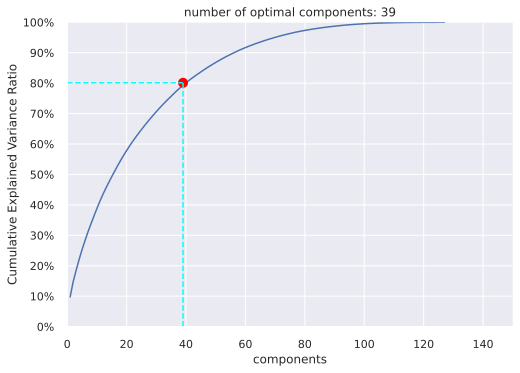

In [37]:
# plot the cumulative explained variance ratios
sns.lineplot(x=list(range(1,127+1)),
             y=np.cumsum(svd.explained_variance_ratio_))
a = np.cumsum(svd.explained_variance_ratio_)
threshold_idx = np.argmax(a >= 0.8)
threshold_int = int(threshold_idx)
plt.title(f"number of optimal components: {threshold_int}")
plt.xlabel("components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.plot(threshold_int, a[threshold_int], marker='o', color = "red", markersize = 10)
plt.plot([threshold_int,threshold_int],[0,a[threshold_int]], color = "cyan", linestyle = "dashed")
plt.plot([0,threshold_int],[a[threshold_int],a[threshold_int]], color = "cyan", linestyle = "dashed")
plt.axis((0,150,0,1))
plt.yticks(np.arange(0,1.1,0.1))
yticks1 = plt.yticks()[0]
yticks1_percentage = [f"{ytick*100:.0f}%" for ytick in yticks1]
plt.yticks(yticks1 , yticks1_percentage)
sns.despine()

### b. Update the model to have 50 components

In [38]:
# fit a TruncatedSVD model with 50 components
svd_optimal = TruncatedSVD(n_components=50 , random_state=42)
U_optimal = svd.fit_transform(X_centered)

In [39]:
# view the explained variance ratios & the cumulative explained variance ratios
svd_optimal.fit(X_centered)
svd_optimal.explained_variance_ratio_

array([0.09789804, 0.04894682, 0.03789467, 0.03545005, 0.03260365,
       0.03009059, 0.02832811, 0.02646591, 0.02540972, 0.02493844,
       0.02390459, 0.02200412, 0.02049362, 0.01946035, 0.01892752,
       0.01820079, 0.01810059, 0.01717123, 0.01669727, 0.01549626,
       0.01513599, 0.01431723, 0.01372992, 0.01308352, 0.01277918,
       0.01251885, 0.01195295, 0.01186751, 0.0113354 , 0.01115351,
       0.01083149, 0.01046041, 0.01008971, 0.00982345, 0.00951782,
       0.00949709, 0.00932269, 0.00867636, 0.00842398, 0.00813951,
       0.00769081, 0.00753257, 0.00701789, 0.00675775, 0.0067033 ,
       0.00662577, 0.00656032, 0.00606276, 0.00598542, 0.00580148])

In [40]:
sum(svd_optimal.explained_variance_ratio_)

np.float64(0.867876977788208)

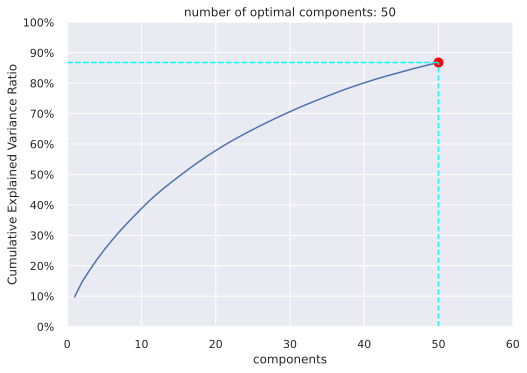

In [41]:
# view the cumulative explained variance ratios
a = np.cumsum(svd_optimal.explained_variance_ratio_)
#threshold_idx = np.argmax(a >= 0.8)
threshold_int = 50# int(threshold_idx)


sns.lineplot(x=list(range(1,threshold_int +1)),
             y=a)

plt.title(f"number of optimal components: {threshold_int}")
plt.xlabel("components")
plt.ylabel("Cumulative Explained Variance Ratio")


plt.plot(threshold_int, a[threshold_int-1], marker='o', color = "red", markersize = 10)

plt.plot([threshold_int,threshold_int],[0,a[threshold_int-1]], color = "cyan", linestyle = "dashed")

plt.plot([0,threshold_int],[a[threshold_int-1],a[threshold_int-1]], color = "cyan", linestyle = "dashed")

plt.axis((0,threshold_int + 10,0,1))

plt.yticks(np.arange(0,1.1,0.1))
yticks1 = plt.yticks()[0]
yticks1_percentage = [f"{ytick*100:.0f}%" for ytick in yticks1]
plt.yticks(yticks1 , yticks1_percentage)


sns.despine()

### c. Introduce a New User

In [42]:
# # here's a new user
# import numpy as np
# import pandas as pd

# # create a user-item matrix
# restaurant_ratings = pd.read_excel('../Data/Restaurant_Ratings.xlsx')
# X = restaurant_ratings.pivot(index='Consumer_ID', columns='Restaurant_Name', values='Overall_Rating').fillna(restaurant_ratings.Overall_Rating.mean())



In [43]:
X.shape[1]

127

In [44]:
new_user = np.full(X.shape[1], np.nan)

In [45]:
new_user

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [46]:
#create a vector of NaN values
vector_length = X.shape[1]
new_user = np.full(vector_length, np.nan)

# populate with 2 ratings
ratings = [2, 2]
positions_to_populate = [40, 60]
new_user[positions_to_populate] = ratings

# view as a DataFrame
new_user_df = pd.DataFrame([new_user], columns=X.columns)
new_user_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# view only the restaurants that the new user rated
new_user_df.T.dropna()

,0
Restaurant_Name,
KFC,2.0
McDonalds Centro,2.0


In [48]:
new_user_df.T.dropna().index.to_list()

['KFC', 'McDonalds Centro']

In [49]:
pd.ExcelFile('Restaurant_Ratings.xlsx').sheet_names

['restaurant_ratings', 'restaurant_details']

In [50]:
# read in the restaurants details (second tab of spreadsheet)
restaurant_details = pd.read_excel('Restaurant_Ratings.xlsx', sheet_name='restaurant_details')
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [51]:
# the new user likes low-priced american chain restaurants
restaurant_details[restaurant_details.Name.isin(new_user_df.T.dropna().index)]

,Restaurant_ID,Name,Cuisine,Price,Franchise
40,132851.0,KFC,American,Low,Yes
60,132583.0,McDonalds Centro,American,Low,Yes


In [52]:
restaurant_ratings['Overall_Rating'].mean().round(2)

np.float64(1.2)

In [53]:
fill_value

np.float64(1.2)

In [54]:
X.mean()

,0
Restaurant_Name,
Abondance Restaurante Bar,1.139130
Arrachela Grill,1.195652
Cabana Huasteca,1.224638
Cafe Ambar,1.186957
Cafe Chaires,1.178261
...,...
Tortas Hawaii,1.202899
Tortas Locas Hipocampo,1.234783
Tortas Y Hamburguesas El Gordo,1.178261


### d. Recommend Restaurants to the New User

In [55]:
# apply the necessary data prep steps to the user

# fill nan values with the mean rating
new_user_df.fillna(fill_value , inplace= True)
# center the data
new_user_centered_df = new_user_df - X.mean()

In [56]:
new_user_centered_df

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,0.06087,0.004348,-0.024638,0.013043,0.021739,-0.027536,0.008696,0.004348,-0.011594,0.001449,...,0.021739,0.005797,0.004348,-0.02029,0.033333,-0.002899,-0.034783,0.021739,0.034783,0.02029


In [57]:
# transform the user into the latent space
new_user_optimal = svd_optimal.transform(new_user_centered_df)

In [58]:
# view the shape of the output
new_user_optimal.shape

(1, 50)

In [59]:
svd_optimal.components_.shape

(50, 127)

In [60]:
# reconstruct the user-item matrix for the user
new_user_pred = np.dot(new_user_optimal , svd_optimal.components_)

In [61]:
# view the shape of the output
new_user_pred.shape

(1, 127)

In [62]:
# make restaurant recommendations for the new user
recs = pd.DataFrame(new_user_pred , columns=X.columns, index = ["Recs"])
recs

Restaurant_Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,Carnitas Mata,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
Recs,0.031521,0.003116,-0.021072,0.0013,0.050521,0.003221,-0.046498,-0.004675,-0.006951,0.001968,...,0.015792,0.006807,0.002845,-0.02174,0.022387,0.008562,-0.030842,-0.11423,0.021734,0.089606


In [63]:
# sort the recommendations
recs.T.sort_values(["Recs"] , ascending=False)

,Recs
Restaurant_Name,
KFC,0.141902
Potzocalli,0.131042
McDonalds Centro,0.123618
Chilis Cuernavaca,0.116482
Restaurant And Bar And Clothesline Carlos N Charlies,0.115719
...,...
Sanborns Casa Piedra,-0.078387
La Estrella De Dimas,-0.101780
Dominos Pizza,-0.105535


In [64]:
# exclude the restaurants the user already rated
recs_final = recs.T[~recs.T.index.isin(['KFC', 'McDonalds Centro'])]


In [65]:
# view the new recommended restaurants
recs_final.head(10)

,Recs
Restaurant_Name,
Abondance Restaurante Bar,0.031521
Arrachela Grill,0.003116
Cabana Huasteca,-0.021072
Cafe Ambar,0.001300
Cafe Chaires,0.050521
Cafe Punta Del Cielo,0.003221
Cafeteria Cenidet,-0.046498
Cafeteria Y Restaurant El Pacifico,-0.004675
Carl's Jr,-0.006951


In [66]:
# view the restaurant details dataframe
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


In [67]:
# combine the predicted ratings and restaurant details dataframes
final_df = (
    recs_final
    .merge(restaurant_details, how = 'left', left_on= 'Restaurant_Name', right_on='Name')
    .drop(columns = "Name")
)


In [68]:
final_df.head(5)

,Recs,Restaurant_ID,Cuisine,Price,Franchise
0,0.031521,135069.0,Bar,Low,No
1,0.003116,135016.0,NaN,Medium,No
2,-0.021072,132754.0,Mexican,Medium,No
3,0.001300,132561.0,NaN,Low,No
4,0.050521,132572.0,Cafeteria,Low,No


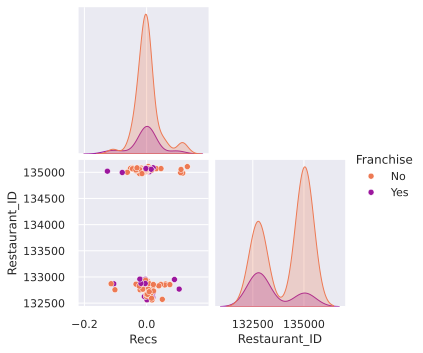

In [69]:
# what are your thoughts on these recommendations?
sns.pairplot(final_df , corner = True , hue = 'Franchise', palette= 'plasma_r')
sns.despine()

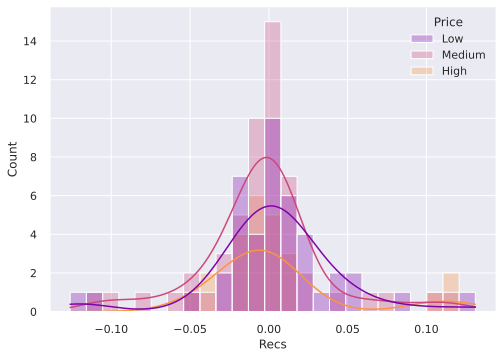

In [70]:
sns.histplot(final_df, x='Recs', palette='plasma', hue = 'Price', kde = True, alpha = 0.3)
sns.despine()

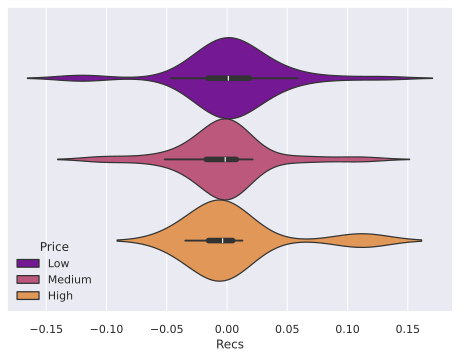

In [71]:
sns.violinplot(final_df , x = "Recs", palette='plasma', hue = 'Price')
plt.show()

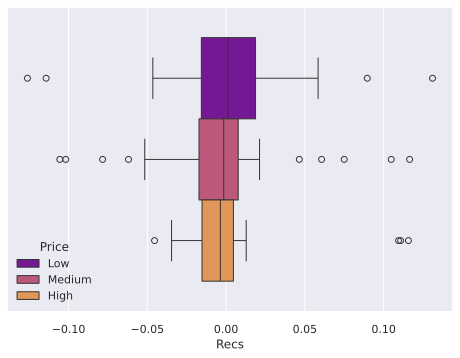

In [72]:
sns.boxplot(final_df ,
            x = "Recs",
            palette='plasma',
            hue = 'Price')
plt.show()

In [73]:
final_df.columns

Index(['Recs', 'Restaurant_ID', 'Cuisine', 'Price', 'Franchise'], dtype='object')

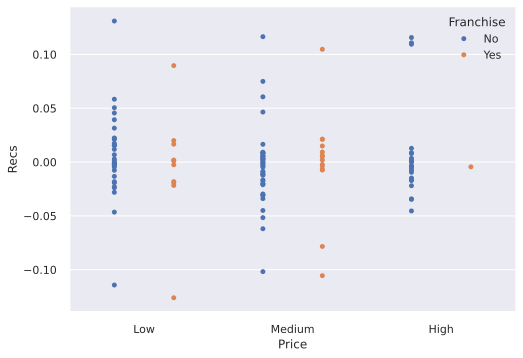

In [74]:
sns.stripplot(final_df ,x ='Price', y = 'Recs' , jitter=0, dodge =1 , hue = 'Franchise' )
sns.despine()

In [75]:
final_df.groupby(["Cuisine"])["Franchise"].count().sort_values(ascending = False)#.index.to_list()

,Franchise
Cuisine,
Mexican,23
Bar,13
Cafeteria,6
Fast Food,6
Japanese,5
Seafood,5
Italian,4
Burgers,4
American,3


In [76]:
sorted_index = final_df.groupby(["Cuisine"])["Franchise"].count().sort_values(ascending = False).index.to_list()

In [77]:
mylist = list(final_df.groupby("Cuisine"))
mylist[0][0]

'American'

In [78]:
for i,k in enumerate(mylist):
  if k[0] == 'Cafeteria':
    print(i)

7


In [79]:
mylist = list(final_df.groupby("Cuisine"))
for i,j in enumerate(mylist):
  print(i, j[0])

0 American
1 Armenian
2 Bakery
3 Bar
4 Breakfast
5 Brewery
6 Burgers
7 Cafeteria
8 Chinese
9 Coffee Shop
10 Contemporary
11 Family
12 Fast Food
13 International
14 Italian
15 Japanese
16 Mexican
17 Pizzeria
18 Regional
19 Seafood
20 Vietnamese


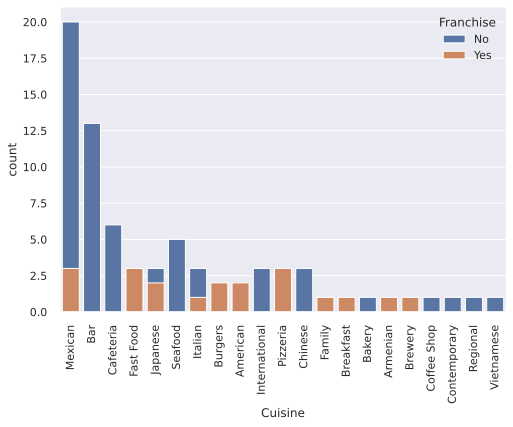

In [80]:
sns.countplot(final_df, x = 'Cuisine', hue ='Franchise', dodge=False, order = sorted_index)
plt.xticks(rotation = 90)
sns.despine()

## 3. Content-Based Filtering: Suggest Similar Restaurants to a Restaurant

In [81]:
restaurant_details.head()

,Restaurant_ID,Name,Cuisine,Price,Franchise
0,135069.0,Abondance Restaurante Bar,Bar,Low,No
1,135016.0,Arrachela Grill,NaN,Medium,No
2,132754.0,Cabana Huasteca,Mexican,Medium,No
3,132561.0,Cafe Ambar,NaN,Low,No
4,132572.0,Cafe Chaires,Cafeteria,Low,No


### a. Prep the data to contain only numeric values

In [82]:
# turn the cuisine, price and franchise columns of the restaurant details data into numeric columns

# turn cuisine into dummy variables
cuisine_num = pd.get_dummies(restaurant_details["Cuisine"],drop_first= True, dtype = 'int')
# turn price into a numeric value
price_num = pd.DataFrame(np.where(restaurant_details["Price"] == 'High',1,
                                  np.where(restaurant_details["Price"] == 'Medium',0,-1)),
                         columns = ["Price"])
# turn franchise into an indicator
franchise_num = pd.DataFrame(np.where(restaurant_details["Franchise"] == 'Yes',1,0), columns = ["Franchise"])

In [83]:
cuisine_num.head(5)

,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,Contemporary,Family,Fast Food,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
price_num.head(5)

,Price
0,-1
1,0
2,0
3,-1
4,-1


In [85]:
franchise_num.head(0)

,Franchise


In [86]:
# combine them into a single dataframe
restaurant_details_df = pd.concat([cuisine_num ,price_num , franchise_num], axis = 1).set_index(restaurant_details["Name"])

In [87]:
restaurant_details_df.head()

,Armenian,Bakery,Bar,Breakfast,Brewery,Burgers,Cafeteria,Chinese,Coffee Shop,Contemporary,...,International,Italian,Japanese,Mexican,Pizzeria,Regional,Seafood,Vietnamese,Price,Franchise
Name,,,,,,,,,,,,,,,,,,,,,
Abondance Restaurante Bar,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Arrachela Grill,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cabana Huasteca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Cafe Ambar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-1,0
Cafe Chaires,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,-1,0


### b. Calculate the cosine similarities between rows

In [88]:
# calculate all the cosine similarities
from sklearn.metrics.pairwise import cosine_similarity

cosine_matrix = cosine_similarity(restaurant_details_df)
cosine_matrix

array([[1. , 0. , 0. , ..., 0.5, 0.5, 0.5],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0.5, 0. , 0. , ..., 1. , 0.5, 0.5],
       [0.5, 0. , 0. , ..., 0.5, 1. , 0.5],
       [0.5, 0. , 0. , ..., 0.5, 0.5, 1. ]])

In [89]:
cosine_df = pd.DataFrame(cosine_matrix,
                         columns = restaurant_details_df.index ,
                         index = restaurant_details_df.index).reset_index()
cosine_df.index.name = None
cosine_df.head()

Name,Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
0,Abondance Restaurante Bar,1.000000,0.0,0.0,0.707107,0.500000,0.000000,0.500000,0.000000,0.0,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.0,0.0,0.500000,0.500000,0.500000
1,Arrachela Grill,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,Cabana Huasteca,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.707107,0.707107,0.707107,0.000000,0.707107,0.0,0.0,0.000000,0.000000,0.000000
3,Cafe Ambar,0.707107,0.0,0.0,1.000000,0.707107,0.000000,0.707107,0.000000,0.0,...,0.707107,0.707107,0.707107,0.707107,0.707107,0.0,0.0,0.707107,0.707107,0.707107
4,Cafe Chaires,0.500000,0.0,0.0,0.707107,1.000000,0.707107,1.000000,0.707107,0.0,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.0,0.0,0.500000,0.500000,0.500000


In [90]:
# find the most similar restuarants to KFC
kfc_recs = cosine_df[["Name","KFC"]].sort_values(by = ["KFC"],ascending=False)
kfc_recs.head(10)

Name,Name,KFC
16,Church's,1.000000
18,Dairy Queen,1.000000
40,KFC,1.000000
60,McDonalds Centro,1.000000
120,Tacos Los Volcanes,1.000000
111,Sirloin Stockade,1.000000
126,Vips,1.000000
68,Pollo Frito Buenos Aires,0.816497
37,Hamburguesas La Perica,0.816497
31,Emilianos,0.816497


In [91]:
# find the details of those restaurants
kfc_recs.merge(restaurant_details).head(10)

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Church's,1.000000,132564.0,NaN,Low,Yes
1,Dairy Queen,1.000000,132884.0,NaN,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,McDonalds Centro,1.000000,132583.0,American,Low,Yes
4,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
5,Sirloin Stockade,1.000000,132877.0,NaN,Low,Yes
6,Vips,1.000000,132951.0,American,Low,Yes
7,Pollo Frito Buenos Aires,0.816497,132609.0,Fast Food,Low,Yes
8,Hamburguesas La Perica,0.816497,132608.0,Mexican,Low,Yes
9,Emilianos,0.816497,132955.0,Brewery,Low,Yes


In [92]:
# what are your thoughts on these recommendations?
# All of them are franchise with the low price.

In [93]:
kfc_recs["KFC"]

,KFC
16,1.000000
18,1.000000
40,1.000000
60,1.000000
120,1.000000
...,...
106,-0.707107
98,-0.707107
96,-0.707107
99,-0.707107


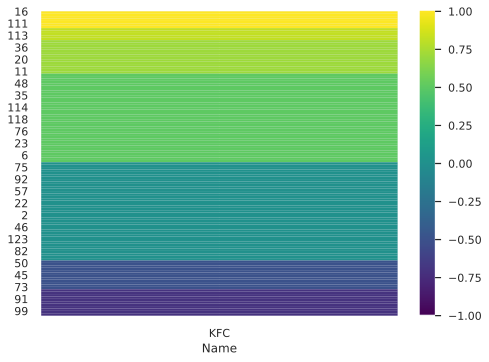

In [94]:
sns.heatmap(kfc_recs[["KFC"]] ,
            vmin = -1,
            vmax = +1,
            cmap = "viridis"
            )
plt.show()

In [126]:
cosine_df.loc[cosine_df.Name.str.contains("McDonalds")]

Name,Name,Abondance Restaurante Bar,Arrachela Grill,Cabana Huasteca,Cafe Ambar,Cafe Chaires,Cafe Punta Del Cielo,Cafeteria Cenidet,Cafeteria Y Restaurant El Pacifico,Carl's Jr,...,Tacos De Barbacoa Enfrente Del Tec,Tacos De La Estacion,Tacos El Guero,Tacos Los Volcanes,Taqueria El Amigo,Tortas Hawaii,Tortas Locas Hipocampo,Tortas Y Hamburguesas El Gordo,Unicol's Pizza,Vips
60,McDonalds Centro,0.5,0.0,0.0,0.707107,0.5,0.0,0.5,0.0,0.5,...,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.5,0.5,1.0
61,McDonalds Parque Tangamanga,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.5


In [128]:
restaurant_details.loc[restaurant_details.Name.str.contains("McDonalds")]

,Restaurant_ID,Name,Cuisine,Price,Franchise
60,132583.0,McDonalds Centro,American,Low,Yes
61,135086.0,McDonalds Parque Tangamanga,Burgers,Medium,Yes


## 4. Summarize Recommendations

In [136]:
# For the user who likes KFC and McDonalds, what are your top 10 restaurant recommendations?
recs_kfc_mcdonal = cosine_df[["Name","KFC","McDonalds Centro"]].sort_values(["KFC", "McDonalds Centro"], ascending=[0,0])
recs_kfc_mcdonal.head(10)

Name,Name,KFC,McDonalds Centro
16,Church's,1.000000,1.000000
18,Dairy Queen,1.000000,1.000000
40,KFC,1.000000,1.000000
60,McDonalds Centro,1.000000,1.000000
111,Sirloin Stockade,1.000000,1.000000
120,Tacos Los Volcanes,1.000000,1.000000
126,Vips,1.000000,1.000000
31,Emilianos,0.816497,0.816497
37,Hamburguesas La Perica,0.816497,0.816497
53,Little Pizza Emilio Portes Gil,0.816497,0.816497


In [138]:
recs_kfc_mcdonal.merge(restaurant_details).head(10)

,Name,KFC,McDonalds Centro,Restaurant_ID,Cuisine,Price,Franchise
0,Church's,1.000000,1.000000,132564.0,NaN,Low,Yes
1,Dairy Queen,1.000000,1.000000,132884.0,NaN,Low,Yes
2,KFC,1.000000,1.000000,132851.0,American,Low,Yes
3,McDonalds Centro,1.000000,1.000000,132583.0,American,Low,Yes
4,Sirloin Stockade,1.000000,1.000000,132877.0,NaN,Low,Yes
5,Tacos Los Volcanes,1.000000,1.000000,132958.0,American,Low,Yes
6,Vips,1.000000,1.000000,132951.0,American,Low,Yes
7,Emilianos,0.816497,0.816497,132955.0,Brewery,Low,Yes
8,Hamburguesas La Perica,0.816497,0.816497,132608.0,Mexican,Low,Yes
9,Little Pizza Emilio Portes Gil,0.816497,0.816497,132667.0,Armenian,Low,Yes


In [96]:
# What are your thoughts on these recommendations and how could you improve your recommendations?

*  the first two make sense, but the next few do not
* try refitting the SVD model with different parameters
* maybe try different data prep steps
* maybe filter out expensive restaurants
* consider a hybrid approach using the cosine similarity results

In [141]:
# For the KFC details page, what are the top 10 other restuarants that you would suggest?
kfc_recs.merge(restaurant_details).head(10)

,Name,KFC,Restaurant_ID,Cuisine,Price,Franchise
0,Church's,1.000000,132564.0,NaN,Low,Yes
1,Dairy Queen,1.000000,132884.0,NaN,Low,Yes
2,KFC,1.000000,132851.0,American,Low,Yes
3,McDonalds Centro,1.000000,132583.0,American,Low,Yes
4,Tacos Los Volcanes,1.000000,132958.0,American,Low,Yes
5,Sirloin Stockade,1.000000,132877.0,NaN,Low,Yes
6,Vips,1.000000,132951.0,American,Low,Yes
7,Pollo Frito Buenos Aires,0.816497,132609.0,Fast Food,Low,Yes
8,Hamburguesas La Perica,0.816497,132608.0,Mexican,Low,Yes
9,Emilianos,0.816497,132955.0,Brewery,Low,Yes


In [98]:
# What are your thoughts on these suggestions and how could you improve your suggestions?


* these all make sense
* consider a hybrid approach to introduce some  non-obvious choices
* consider introducing additional features like distance from the restaurant